# Chapter 10  Unsupervised Learning

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
from scipy import stats
from numpy.random import randn # Gauss random numbers

## 10.1 K-means Clustering

In [2]:
def k_means(X,K,iteration=20):
    n,p=X.shape
    center=np.zeros((K,p))
    y=np.random.choice(K,n,replace=True)
    scores=[]
    for h in range(iteration):
        for k in range(K):
            if np.sum(y==k)==0:
                center[k,0]=np.inf
            else:
                for j in range(p):
                    center[k,j]=np.mean(X[y==k,j])
        S_total=0
        for i in range(n):
            S_min=np.inf
            for k in range(K):
                S=np.sum((X[i,]-center[k,])**2)
                if S<S_min:
                    S_min=S
                    y[i]=k
            S_total+=S_min
        scores.append(S_total)
    return {'clusters':y, 'scores':scores}

In [3]:
n=1000;K=5;p=2
X=randn(n,p)  # Data Generation

Text(0, 0.5, 'Second Component')

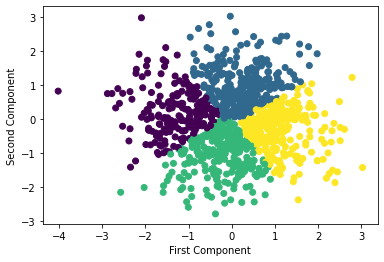

In [4]:
y=k_means(X,5)['clusters'] # Obtain the cluster for each sample
# Change the color of the points according to the clusters
plt.scatter(X[:,0],X[:,1],c=y)
plt.xlabel("First Component")
plt.ylabel("Second Component")

([<matplotlib.axis.XTick at 0x21211b18a00>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

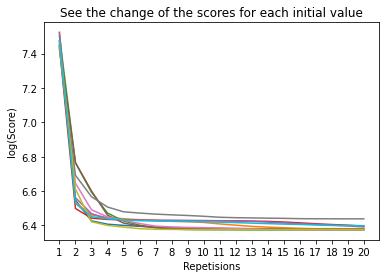

In [5]:
n=1000;p=2
X=randn(n,p)
itr=np.arange(1,21,1)
for r in range(10):
    scores=k_means(X,5)['scores']
    plt.plot(itr,np.log(scores))
plt.xlabel("Repetisions")
plt.ylabel("log(Score)")
plt.title("See the change of the scores for each initial value")
plt.xticks(np.arange(1,21,1))

## 10.2 階層的クラスタリング

In [6]:
def dist_complete(x,y):
    r=x.shape[0]
    s=y.shape[0]
    dist_max=0
    for i in range(r):
        for j in range(s):
            d=np.linalg.norm(x[i,]-y[j,])
            if d>dist_max:
                dist_max=d
    return dist_max

In [7]:
def dist_single(x,y):
    r=x.shape[0]
    s=y.shape[0]
    dist_min=np.inf
    for i in range(r):
        for j in range(s):
            d=np.linalg.norm(x[i,]-y[j,])
            if d<dist_min:
                dist_min=d
    return dist_min

In [8]:
def dist_centroid(x,y):
    r=x.shape[0]
    s=y.shape[0]
    x_bar=0
    for i in range(r):
        x_bar=x_bar+x[i,]
    x_bar=x_bar/r
    y_bar=0
    for i in range(s):
        y_bar=y_bar+y[i,]
    y_bar=y_bar/s
    return (np.linalg.norm(x_bar-y_bar))

In [9]:
def dist_average(x,y):
    r=x.shape[0]
    s=y.shape[0]
    S=0
    for i in range(r):
        for j in range(s):
            S=S+np.linalg.norm(x[i,]-y[j,])
    return(S/r/s)

In [10]:
import copy

In [12]:
def hc(X,dd="complete"):
    n=X.shape[0]
    index=[[i] for i in range(n)]
    cluster=[[] for i in range(n-1)]
    for k in range(n,1,-1):
        #index_2=[]
        dist_min=np.inf
        for i in range(k-1):
            for j in range(i+1,k):
                i_0=index[i];j_0=index[j]
                if dd == "complete":
                    d=dist_complete(X[i_0,],X[j_0,])
                elif dd == "single":
                    d=dist_single(X[i_0,],X[j_0,])
                elif dd == "centroid":
                    d=dist_centroid(X[i_0,],X[j_0,])
                elif dd == "average":
                    d=dist_average(X[i_0,],X[j_0,])
                if d<dist_min:
                    dist_min=d
                    i_1=i    # The index of the list to be connected.
                    j_1=j    # The index of the newly added list.
        index[i_1].extend(index[j_1])  # connect them
        if j_1 < k:               # delete one immediately after the added index
            for h in range(j_1+1,k,1):
                index[h-1]=index[h]
        index2=copy.deepcopy(index[0:(k-1)])  # if we use the index, it changes each time.
        cluster[k-2].extend(index2)
    return cluster  # The result can be seen from the bottom.

In [13]:
n=200;p=2
X=randn(n,p)
cluster=hc(X,"complete")

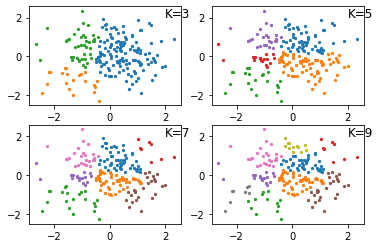

In [14]:
K=[2,4,6,8] # The numbers of clusters are 3,5,7,9
for i in range(4):
    grp=cluster[K[i]]  # Choose the result when the number of the clusters is K[i].
    plt.subplot(2,2,i+1)
    for k in range(len(grp)):
        x=X[grp[k],0]
        y=X[grp[k],1]
        plt.scatter(x,y,s=5)
    plt.text(2,2,"K={}".format(K[i]+1),fontsize=12)

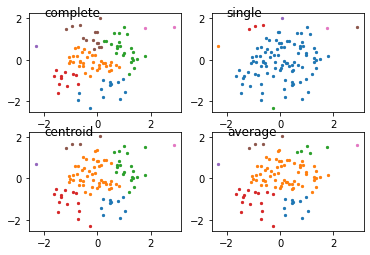

In [15]:
n=100;p=2;K=7
X=randn(n,p)
i=1
for d in ["complete","single","centroid","average"]:
    cluster=hc(X,dd=d)
    plt.subplot(2,2,i)
    i=i+1
    grp=cluster[K-1]
    for k in range(K):
        x=X[grp[k],0]
        y=X[grp[k],1]
        plt.scatter(x,y,s=5)
    plt.text(-2,2.1,"{}".format(d),fontsize=12)

### The dendroid Program (Appendix)

In [16]:
import matplotlib.pyplot as plt
import matplotlib.collections as mc
import matplotlib.cm as cm

In [17]:
def unlist(x):
    y = []
    for z in x:
        y.extend(z)
    return(y)

In [24]:
def hc_dendroidgram(cluster,dd="complete",col="black"):
    y=unlist(cluster[0])
    n=len(y)
    z=np.zeros([n,5])
    index=[[y[i]] for i in range(n)]
    height=np.zeros(n)
    for k in range(n-1,0,-1):
        dist_min=np.inf
        for i in range(k):
            i_0=index[i];j_0=index[i+1]
            if dd == "complete":
                d=dist_complete(X[i_0,],X[j_0,])
            elif dd == "single":
                d=dist_single(X[i_0,],X[j_0,])
            elif dd == "centroid":
                d=dist_centroid(X[i_0,],X[j_0,])
            elif dd == "average":
                d=dist_average(X[i_0,],X[j_0,])
            if d<dist_min:
                dist_min=d
                i_1=i      # the index of the list to be connected.
                j_1=i+1    # the index of the newly added list
        # Compute the locations of the lines below
        i=0
        for h in range(i_1):
            i=i+len(index[h])
        z[k,0]=i+len(index[i_1])/2
        z[k,1]=i+len(index[i_1])+len(index[j_1])/2
        z[k,2]=height[i_1]
        z[k,3]=height[j_1]
        z[k,4]=dist_min
        index[i_1].extend(index[j_1])
        if j_1 < k:               
            for h in range(j_1,k):
                index[h]=index[h+1]
                height[h]=height[h+1]
        height[i_1]=dist_min
        height[k]=0
         # The loop ends here
    lines =  [[(z[k,0], z[k,4]), (z[k,0], z[k,2])] for k in range(1,n)] # Vertical Line (Left)
    lines2 = [[(z[k,0], z[k,4]), (z[k,1], z[k,4])] for k in range(1,n)] # Horizontal Line (Center)
    lines3 = [[(z[k,1], z[k,4]), (z[k,1], z[k,3])] for k in range(1,n)] # Vertical Line (Right)
    lines.extend(lines2)
    lines.extend(lines3)
    lc = mc.LineCollection(lines, colors=col, linewidths=1) 
    fig = plt.figure(figsize=(4,4))
    ax = fig.add_subplot()
    ax.add_collection(lc)
    ax.autoscale()
    plt.show()
    fig = plt.figure(figsize=(4,4))

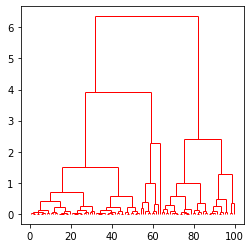

<Figure size 288x288 with 0 Axes>

In [25]:
n=100;p=1;
X=randn(n,p)
cluster=hc(X,dd="complete")
hc_dendroidgram(cluster,col="red")

In [26]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [27]:
X=randn(20,2)

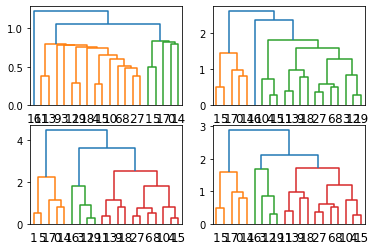

In [28]:
i=1
for d in ["single","average","complete","weighted"]:
    res_hc=linkage(X,method=d)
    plt.subplot(2,2,i)
    i+=1
    dendrogram(res_hc)

## 10.3 Principle Component Analysis

In [29]:
def pca(X):
    n,p=X.shape
    center=np.average(X,0)
    X=X-center # Centralization of Columns
    Sigma=X.T@X/n
    lam,phi= np.linalg.eig(Sigma)  # Eigenvalue, Eigenvector
    index = np.argsort(-lam)  # Sort in the ascending order
    lam = lam[index]
    phi = phi[:,index]
    return {'lam':lam,'vectors':phi,'centers':center}

In [30]:
X=randn(100,5)

In [31]:
res=pca(X)

In [32]:
res['lam']  

array([1.27423129, 1.1855804 , 0.97573336, 0.91334012, 0.60081004])

In [33]:
res['lam']/np.sum(res['lam'])  # The proportion of each component, the same as evr below

array([0.25743631, 0.23952594, 0.19712999, 0.18452452, 0.12138324])

In [34]:
res['vectors']

array([[-0.42323708,  0.49809239, -0.2742282 , -0.18774356, -0.67994529],
       [ 0.85025947,  0.38467599, -0.01514231, -0.32542815, -0.15149404],
       [ 0.00135844, -0.50799787,  0.58224952, -0.39138936, -0.49973612],
       [ 0.27763185, -0.1164862 ,  0.0232588 ,  0.81603498, -0.49284629],
       [ 0.14438809, -0.5764525 , -0.76486216, -0.19937443, -0.14862807]])

In [35]:
res['centers']

array([-0.10530414, -0.03889203, -0.0353989 , -0.06663984, -0.24134286])

In [36]:
from sklearn.decomposition import PCA

In [63]:
pca=PCA()
pca.fit(X) #execution

PCA()

In [64]:
score=pca.fit_transform(X) # principle component score (row:size n  column: component)
score[0:5,]

array([[ 0.11239148,  1.88363235,  0.96884566, -1.55786928, -0.63414578],
       [-0.33918135, -0.75573084,  0.11057383,  1.68993353,  0.37779418],
       [ 0.3382025 ,  1.00171192, -0.9128227 ,  0.12345229,  1.05642749],
       [ 0.88330475,  0.20025244,  0.20593568, -0.66017152,  0.21746887],
       [-0.94530787,  0.69705323,  0.46468243, -0.53668813,  0.66067868]])

In [65]:
pca.components_ # does not distinguish + and -

array([[ 0.42323708, -0.85025947, -0.00135844, -0.27763185, -0.14438809],
       [-0.49809239, -0.38467599,  0.50799787,  0.1164862 ,  0.5764525 ],
       [-0.2742282 , -0.01514231,  0.58224952,  0.0232588 , -0.76486216],
       [ 0.18774356,  0.32542815,  0.39138936, -0.81603498,  0.19937443],
       [-0.67994529, -0.15149404, -0.49973612, -0.49284629, -0.14862807]])

In [66]:
pca.mean_    # the same as centers

array([-0.10530414, -0.03889203, -0.0353989 , -0.06663984, -0.24134286])

In [67]:
evr=pca.explained_variance_ratio_  # How much among the whole each component explains
evr

array([0.25743631, 0.23952594, 0.19712999, 0.18452452, 0.12138324])

Text(0, 0.5, 'Proportion')

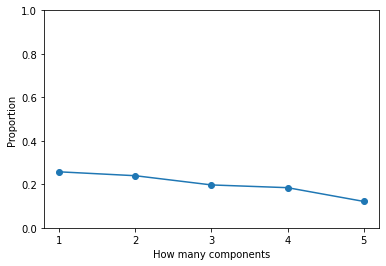

In [68]:
plt.plot(np.arange(1,6),evr)
plt.scatter(np.arange(1,6),evr)
plt.xticks(np.arange(1,6))
plt.ylim(0,1)
plt.xlabel("How many components")
plt.ylabel("Proportion")

Text(0, 0.5, 'Cumulative Proportion')

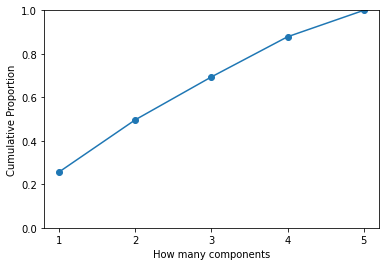

In [69]:
plt.plot(np.arange(1,6),np.cumsum(evr))
plt.scatter(np.arange(1,6),np.cumsum(evr))
plt.xticks(np.arange(1,6))
plt.ylim(0,1)
plt.xlabel("How many components")
plt.ylabel("Cumulative Proportion")

(-4.0, 4.0)

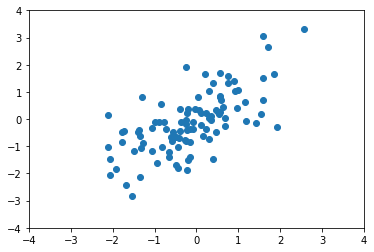

In [70]:
n=100;a=0.7
b=np.sqrt(1-a**2)
u=randn(n);v=randn(n)
x=u
y=u*a+v*b
plt.scatter(x,y)
plt.xlim(-4,4)
plt.ylim(-4,4)

In [71]:
D=np.concatenate((x.reshape(-1,1),y.reshape(-1,1)),1)

In [72]:
pca.fit(D)

PCA()

In [73]:
T=pca.components_   
T[0,1]/T[0,0]*T[1,1]/T[1,0]   # Two compornents are orthogonal

-1.0

In [74]:
def f_1(x):
    y=T[0,1]/T[0,0]*x
    return y
def f_2(x):
    y=T[1,1]/T[1,0]*x
    return y

In [75]:
x_seq=np.arange(-4,4,0.5)

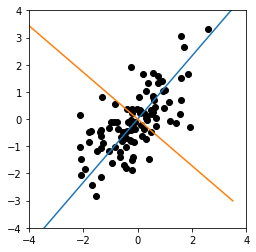

In [76]:
plt.scatter(x,y,c="black")
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.plot(x_seq,f_1(x_seq))
plt.plot(x_seq,f_2(x_seq))
plt.gca().set_aspect('equal', adjustable='box')

In [77]:
import pandas as pd
USA=pd.read_csv('USArrests.csv',header=0,index_col=0)
X=(USA-np.average(USA,0))/np.std(USA,0)
index=USA.index
col=USA.columns

In [78]:
pca=PCA(n_components=2)
pca.fit(X)
score=pca.fit_transform(X)
vector=pca.components_
vector

array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [ 0.41818087,  0.1879856 , -0.87280619, -0.16731864]])

In [79]:
vector.shape[1]

4

In [80]:
evr=pca.explained_variance_ratio_  
evr

array([0.62006039, 0.24744129])

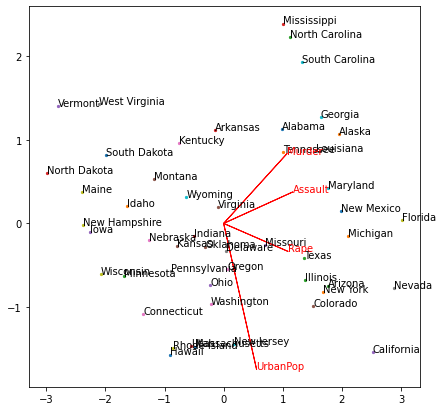

In [81]:
plt.figure(figsize=(7, 7))
for i in range(score.shape[0]):
    plt.scatter(score[i,0], score[i,1],s=5)
    plt.annotate(index[i], xy=(score[i,0], score[i,1]))
for j in range(vector.shape[1]):
    plt.arrow(0,0,vector[0,j]*2,vector[1,j]*2,color="red")  
    plt.text(vector[0,j]*2,vector[1,j]*2,col[j],color="red")

In [82]:
from sklearn.datasets import load_boston
Boston=load_boston()

In [83]:
Z=np.concatenate((Boston.data,Boston.target.reshape(-1,1)),1)

In [84]:
from sklearn.cluster import KMeans
K_means=KMeans(n_clusters=5)
K_means.fit(Z)
y=K_means.fit_predict(Z)  

In [85]:
pca.fit(Z)
W=pca.fit_transform(Z)[:,[0,1]] 

Text(0.5, 1.0, 'Boston Data Clustering')

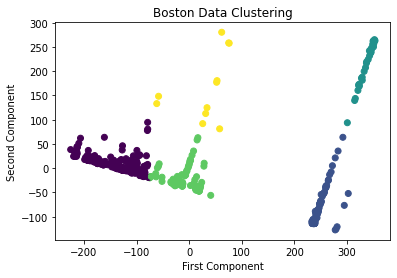

In [86]:
plt.scatter(W[:,0],W[:,1],c=y)
plt.xlabel("First Component")
plt.ylabel("Second Component")
plt.title("Boston Data Clustering")

In [87]:
def pca_regression(X,y,m):
    pca=PCA(n_components=m)
    pca.fit(X)
    Z=pca.fit_transform(X) 
    phi=pca.components_  
    theta=np.linalg.inv(Z.T@Z)@Z.T@y
    beta=phi.T@theta
    return {'theta':theta, 'beta':beta}

In [88]:
n=100;p=5
X=randn(n,p)
X=X-np.average(X,0)

In [89]:
y=X[:,0]+X[:,1]+X[:,2]+X[:,3]+X[:,4]+randn(n)
y=y-np.mean(y)

In [90]:
pca_regression(X,y,3)

{'theta': array([-0.66268005,  0.11540127,  1.9323947 ]),
 'beta': array([0.95232034, 0.77392762, 1.5018273 , 0.29416444, 0.58199281])}

In [91]:
pca_regression(X,y,5)['beta']

array([1.14825263, 1.09322646, 0.92358531, 0.81227806, 1.0670581 ])

In [92]:
np.linalg.inv(X.T@X)@X.T@y

array([1.14825263, 1.09322646, 0.92358531, 0.81227806, 1.0670581 ])